In [1]:
import node  
import importlib 
import random

import simulator
import packet
import pandas as pd
import networkx as nx

# Simulator

## Example of node 

In [2]:
importlib.reload(node)
importlib.reload(simulator)
importlib.reload(packet)

from simulator import *
from packet import *
from node import *

random.seed(2)

a = Node('A','fast')
b = Node('B','static')
c = Node('C','static')
a.get_packet(Packet(1, 'A', 'C'))
a.packet_list[1].is_original()
#s.send_packet


True

In [10]:
importlib.reload(node)
importlib.reload(simulator)
importlib.reload(packet)

from simulator import *
from packet import *
from node import *

random.seed(9)


##############################
# PARAMETERS
##############################
#simulation setup
radius = 50
arrival_rate = 1/10
energy_per_packet = 5
deltaP = 0.7 #sigma
deltaW = 0.5 #beta
alpha = 0.2 #alpha
simulation_len = 50
last_generated_packet = simulation_len #/10
max_bundle_size = 5

debug = False
num_dev = 4
###############################



s= Simulator(num_dev/(300*150), 
             classes = {'static':30, 'slow':50, 'fast':20} ,
             arrival_rate = arrival_rate,
             energy_per_packet = energy_per_packet,
             deltaP = deltaP,
             deltaW = deltaW, 
             alpha = alpha,
             max_bundle_size = max_bundle_size,
             debug = debug,
             radius = radius)

generated_pcks = []
received_pcks = []
dropped_pcks = []
energy_consumption = []
remaining_energy = []
P_succ = []
W_sum = []
generated_counter = 0

for i in range(simulation_len):
    
    #update distances, B and P_succ of near nodes
    s.update_nodes_info()
    
    
    #print(s.nodes_positions)
    
    #generate new pkts
    if generated_counter < last_generated_packet:
        generated_counter += 1
        generated_pcks.append(s.generate_packets())
    
    print( '(' + str(i) +')', end = ' ')
    
    #for every node with at least a packet start the diffusion
    # a node decide to who he wants to send the packet
    # the reveiver decide if he wants to accept it
    # -> link weights and P_succ update 
    
    rec, drop, energy =  s.communicate(mode = "MD")
    received_pcks.append(rec)
    energy_consumption.append(energy)
    dropped_pcks.append(drop)
    
    s.charge_nodes()
    remaining_energy.append(sum([node.energy for node in s.nodes]))
    P_succ.append(sum([node.P_succ for node in s.nodes]))
    W_sum.append(sum([i[2] for i in s.graph.edges(data =  'weight')]))
    

                
    # move nodes
    s.move_nodes()
    
    
        

    

(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) 

# Simulation

In [13]:
#%%capture cap --no-stderr
importlib.reload(node)
importlib.reload(simulator)
importlib.reload(packet)

from simulator import *
from packet import *
from node import *

random.seed(9)


##############################
# PARAMETERS
##############################
#simulation setup
radius = 50
arrival_rate = 1/10
energy_per_packet = 5
deltaP = 0.5 #sigma
deltaW = 0.3 #beta 
alpha = 0.001 #lpha
simulation_len = 1000
last_generated_packet = simulation_len #/10
max_bundle_size = 5

debug = False
num_dev = 20
###############################



s= Simulator(num_dev/(300*150), 
             classes = {'static':30, 'slow':50, 'fast':20} ,
             arrival_rate = arrival_rate,
             energy_per_packet = energy_per_packet,
             deltaP = deltaP,
             deltaW = deltaW, 
             alpha = alpha,
             max_bundle_size = max_bundle_size,
             debug = debug,
             radius = radius)

generated_pcks = []
received_pcks = []
dropped_pcks = []
energy_consumption = []
remaining_energy = []
P_succ = []
W_sum = []
generated_counter = 0

for i in range(simulation_len):
    
    #update distances, B and P_succ of near nodes
    s.update_nodes_info()
    
    #print(s.nodes_positions)
    
    #generate new pkts
    if generated_counter < last_generated_packet:
        generated_counter += 1
        generated_pcks.append(s.generate_packets())
    
    #for every node with at least a packet start the diffusion
    # a node decide to who he wants to send the packet
    # the reveiver decide if he wants to accept it
    # -> link weights and P_succ update 
    
    #for anode in s.nodes:
    #    print(anode.id)
    #    print([pck for pck in anode.packet_list])
    
    
    rec, drop, energy =  s.communicate(mode = "MD")
    received_pcks.append(rec)
    energy_consumption.append(energy)
    dropped_pcks.append(drop)
    
    
    
    s.charge_nodes()
    remaining_energy.append(sum([node.energy for node in s.nodes]))
    P_succ.append(sum([node.P_succ for node in s.nodes]))
    W_sum.append(sum([i[2] for i in s.graph.edges(data =  'weight')]))
    

                
    # move nodes
    s.move_nodes()
    
    
    print( '(' + str(i) +')', end = ' ')

    

(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121) (122) (123) (124) (125) (126) (127) (128) (129) (130) (131) (132) (133) (134) (135) (136) (137) (138) (139) (140) (141) (142) (143) (144) (145) (146) (147) (148) (149) (150) (151) (152) (153) (154) (155) (156) (157) (158) (159) (160) (161) (162) (163) (164) (165) (166) (167) (168) (169) (170) (171) (172) (173) (174) (175) (176) (177) (178) (179) (180) (181) (182) (183) (184) 

<BarContainer object of 47 artists>

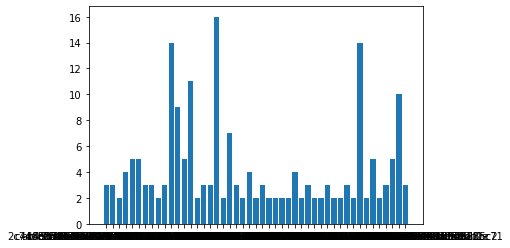

In [18]:
import matplotlib.pyplot as plt
copies = s.copy_counter
received = s.received_packets
n_copies = {k:copies[k] for k in copies.keys() & received}

plt.bar(n_copies.keys(), n_copies.values())

In [106]:
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

chiamano # Plot

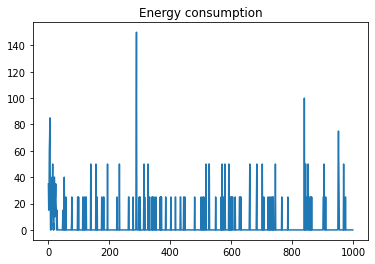

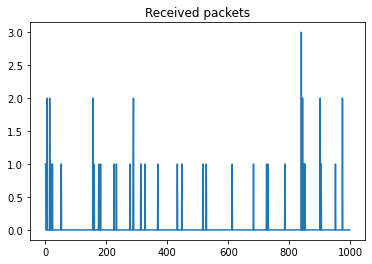

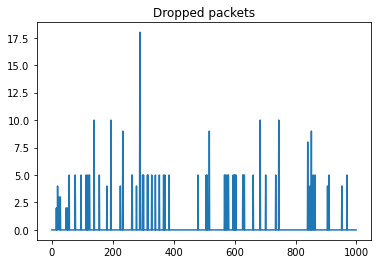

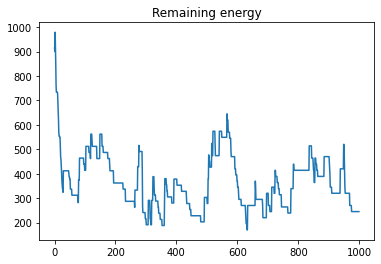

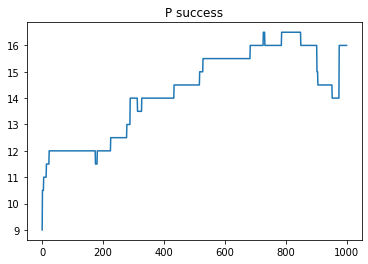

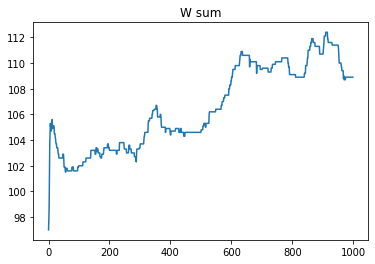

Received packets = 2.2705314009661834%
Dropped packets = 17.681159420289855%
Packet still in the system: 107.14975845410628%
Received packets over energy radio = 5.393186225572882e-06


In [20]:
import matplotlib.pyplot as plt
plt.plot(range(simulation_len),energy_consumption)
plt.title("Energy consumption")
plt.show()

plt.plot(range(simulation_len),received_pcks)
plt.title("Received packets")
plt.show()

plt.plot(range(simulation_len),dropped_pcks)
plt.title("Dropped packets")
plt.show()

plt.plot(range(simulation_len),remaining_energy)
plt.title("Remaining energy")
plt.show()

plt.plot(range(simulation_len),P_succ)
plt.title("P success")
plt.show()

plt.plot(range(simulation_len),W_sum)
plt.title("W sum")
plt.show()

print('Received packets = ' + str(sum(received_pcks)/sum(generated_pcks)*100) + '%')
print('Dropped packets = ' + str(sum(dropped_pcks)/sum(generated_pcks)*100) + '%')
print('Packet still in the system: ' + str(sum([len(node.packet_list) for node in s.nodes])/sum(generated_pcks)*100) + '%')
print('Received packets over energy radio = ' + str(sum(received_pcks)/sum(generated_pcks)/sum(energy_consumption)))


# Animation

In [5]:
node_pos = [node.past_positions for node in s.nodes]

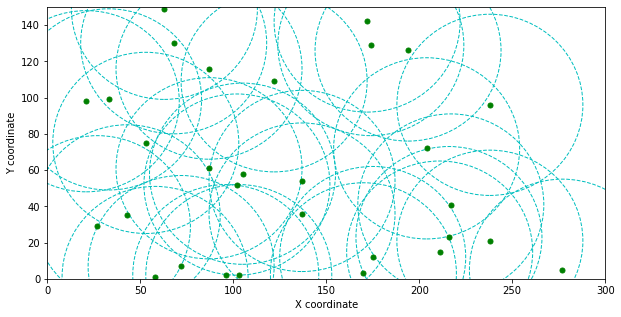

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from matplotlib import animation


# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot() #plt.subplot(1,1,1)

ax2.set_xlim((0,300))
ax2.set_ylim((0,150))
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')
#ax2.set_title('Position')


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
#line3, = ax2.plot([], [], 'y', lw=2)

x_nodes_pos = np.array([node_pos[0,0] for node_pos in node_pos])
y_nodes_pos = np.array([node_pos[0,1] for node_pos in node_pos])    
circle_patches = []
for dev in range(len(x_nodes_pos)):
    circle = plt.Circle((x_nodes_pos[dev], y_nodes_pos[dev]), radius, color='c', linestyle = '--', fill=False)
    #circle.center = (5, 5)
    circle_patches.append(circle)
    ax2.add_patch(circle)
#plt.close()
# animation function. This is called sequentially
def drawframe(n):
    #x = np.linspace(0, 2, 1000)
    #y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    #y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    
    #line1.set_data(x, y1)
    #line2.set_data(x, y2)
    
    #line3.set_data(pos[n][0],pos[n][1])
    
    x_nodes_pos = np.array([node_pos[n,0] for node_pos in node_pos])
    y_nodes_pos = np.array([node_pos[n,1] for node_pos in node_pos])
    pt1.set_data(x_nodes_pos, y_nodes_pos)
    for dev in range(len(x_nodes_pos)):
        #circle = plt.Circle((x_nodes_pos[dev], y_nodes_pos), 0.5, color='b', fill=False)
        
        circle_patches[dev].center = (x_nodes_pos[dev], y_nodes_pos[dev])
            
    #txt_title.set_text('Frame = {0:4d}'.format(n))
    return [pt1] + circle_patches,

pt1, = ax2.plot([], [], 'g.', ms=10)

# blit=True re-draws only the parts that have changed.
#interval = time
anim = animation.FuncAnimation(fig, drawframe, frames=simulation_len, interval=70, blit=False)

HTML(anim.to_html5_video())
plt.savefig('results/nodes')


# Epidemic

In [16]:
importlib.reload(node)
importlib.reload(simulator)
importlib.reload(packet)

from simulator import *
from packet import *
from node import *

random.seed(9)


##############################
# PARAMETERS
##############################
#simulation setup
radius = 50
arrival_rate = 1/10
energy_per_packet = 5
deltaP = 0.1 #sigma
deltaW = 0.1 #beta
alpha = 0.05 #alpha
simulation_len = 1000
last_generated_packet = simulation_len #/10
max_bundle_size = 20

debug = False
num_dev = 20
###############################



s_p= Simulator(num_dev/(300*150), 
             classes = {'static':30, 'slow':50, 'fast':20} ,
             arrival_rate = arrival_rate,
             energy_per_packet = energy_per_packet,
             deltaP = deltaP,
             deltaW = deltaW, 
             alpha = alpha,
             max_bundle_size = max_bundle_size,
             radius = radius,
             debug = debug)

p_generated_pcks = []
p_received_pcks = []
p_dropped_pcks = []
p_energy_consumption = []
p_remaining_energy = []
p_P_succ = []
p_W_sum = []
generated_counter = 0
charged_en = 0
initial_energy = sum([n.energy for n in s_p.nodes])

for i in range(simulation_len):
    
    #update distances, B and P_succ of near nodes
    s_p.update_nodes_info()
    
    #print(s.nodes_positions)
    
    #generate new pkts
    if generated_counter < last_generated_packet:
        generated_counter += 1
        p_generated_pcks.append(s_p.generate_packets())
    
    #for every node with at least a packet start the diffusion
    # a node decide to who he wants to send the packet
    # the reveiver decide if he wants to accept it
    # -> link weights and P_succ update 
    
    rec, drop, energy =  s_p.communicate(mode = "epidemic")
    p_received_pcks.append(rec)
    p_energy_consumption.append(energy)
    #p_dropped_pcks.append(drop)
    
    charged_en += s_p.charge_nodes()
    
    p_remaining_energy.append(sum([node.energy for node in s_p.nodes]))
    #p_P_succ.append(sum([node.P_succ for node in s.nodes]))
    #p_W_sum.append(sum([i[2] for i in s.graph.edges(data =  'weight')]))
    

                
    # move nodes
    s_p.move_nodes()
    
    
    print( '(' + str(i) +')', end = ' ')

    

(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121) (122) (123) (124) (125) (126) (127) (128) (129) (130) (131) (132) (133) (134) (135) (136) (137) (138) (139) (140) (141) (142) (143) (144) (145) (146) (147) (148) (149) (150) (151) (152) (153) (154) (155) (156) (157) (158) (159) (160) (161) (162) (163) (164) (165) (166) (167) (168) (169) (170) (171) (172) (173) (174) (175) (176) (177) (178) (179) (180) (181) (182) (183) (184) 

<BarContainer object of 44 artists>

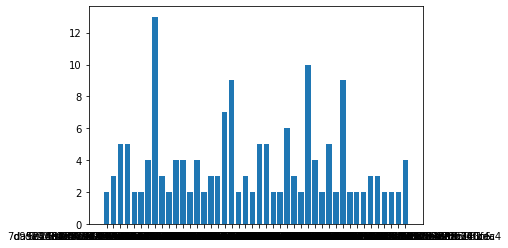

In [17]:
import matplotlib.pyplot as plt
copies = s_p.copy_counter
received = s_p.received_packets
n_copies = {k:copies[k] for k in copies.keys() & received}

plt.bar(n_copies.keys(), n_copies.values())

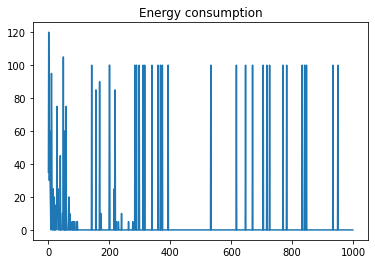

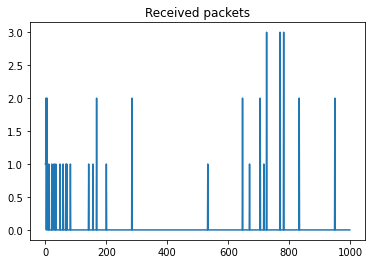

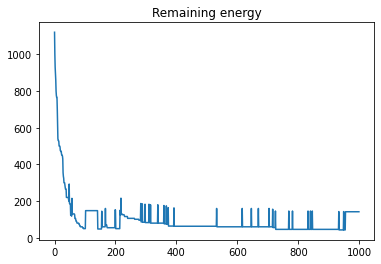

Received packets = 2.2323693556570268%
Received packets over energy radio = 5.143708192758126e-06


In [21]:
simulation_len = 1000
import matplotlib.pyplot as plt
plt.plot(range(simulation_len),p_energy_consumption)
plt.title("Energy consumption")
plt.show()

plt.plot(range(simulation_len),p_received_pcks)
plt.title("Received packets")
plt.show()


plt.plot(range(simulation_len),p_remaining_energy)
plt.title("Remaining energy")
plt.show()

print('Received packets = ' + str(sum(p_received_pcks)/sum(p_generated_pcks)*100) + '%')
#print('Packet still in the system: ' + str(sum([len(node.packet_list) for node in s.nodes])/sum(generated_pcks)*100) + '%')
print('Received packets over energy radio = ' + str(sum(p_received_pcks)/sum(p_generated_pcks)/sum(p_energy_consumption)))


In [36]:
print("total energy consumption: "+ str(sum(p_energy_consumption)))
print((p_remaining_energy[-1]))
print("energy in devices: " + str(initial_energy + charged_en))

total energy consumption: 4475
72
energy in devices: 4547


# Epidemic Vs DEBATE ($\alpha = 0.01$, $\beta = 0.1$, $\sigma = 0.1$)

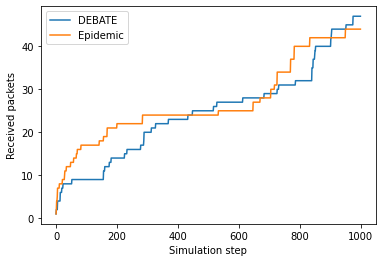

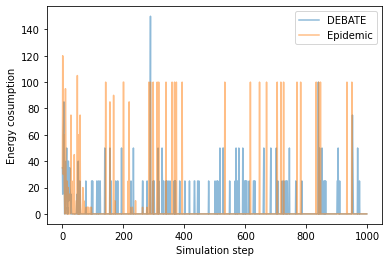

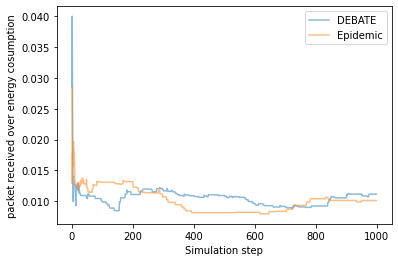

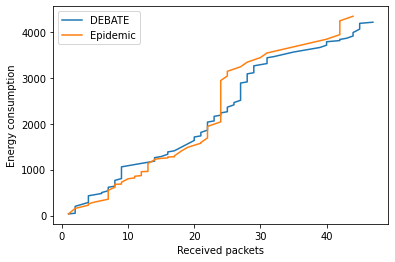

In [22]:
r = 1000
plt.plot(range(r), np.cumsum(received_pcks)[:r])
plt.plot(range(r), np.cumsum(p_received_pcks)[:r])
plt.xlabel('Simulation step')
plt.ylabel('Received packets')

plt.legend(['DEBATE', 'Epidemic'])
plt.savefig('results/debate_epidemic')
plt.show()


#plt.plot(range(1000), )
plt.plot(range(r), energy_consumption[:r], alpha=0.5)
plt.plot(range(r), p_energy_consumption[:r], alpha = 0.5)
plt.xlabel('Simulation step')
plt.ylabel('Energy cosumption')

plt.legend(['DEBATE', 'Epidemic'])
plt.savefig('results/remaining_energy')
plt.show()


#plt.plot(range(1000), )
plt.figure()
#sum(received_pcks)/sum(generated_pcks)/sum(energy_consumption)
#score_debate = (np.cumsum(received_pcks)/np.cumsum(generated_pcks)/np.cumsum(energy_consumption))[800:r]
#score_epidemic = (np.cumsum(p_received_pcks)/np.cumsum(p_generated_pcks)/np.cumsum(p_energy_consumption))[800:r]
score_debate = (np.cumsum(received_pcks)/np.cumsum(energy_consumption))[:r]
score_epidemic = (np.cumsum(p_received_pcks)/np.cumsum(p_energy_consumption))[:r]

plt.plot(range(r), np.nan_to_num(score_debate), alpha=0.5)
plt.plot(range(r), np.nan_to_num(score_epidemic) , alpha = 0.5)

plt.xlabel('Simulation step')
plt.ylabel('packet received over energy cosumption')

plt.legend(['DEBATE', 'Epidemic'])
#plt.savefig('results/remaining_energy')
plt.show()



plt.figure()
plt.plot(np.cumsum(received_pcks), np.cumsum(energy_consumption))
plt.plot(np.cumsum(p_received_pcks), np.cumsum(p_energy_consumption))

plt.xlabel('Received packets')
plt.ylabel('Energy consumption')

plt.legend(['DEBATE', 'Epidemic'])
#plt.savefig('results/remaining_energy')
plt.show()


# BEBATE $\alpha = 0$ vs $\alpha = 1$

In [695]:
importlib.reload(simulator)
from simulator import *
received_pcks_1, dropped_pcks_1, energy_consumption_1, remaining_energy_1, P_succ_1, W_sum_1 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.1,
                                                                                                              deltaW = 0.1,
                                                                                                              alpha = 0,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)


(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121) (122) (123) (124) (125) (126) (127) (128) (129) (130) (131) (132) (133) (134) (135) (136) (137) (138) (139) (140) (141) (142) (143) (144) (145) (146) (147) (148) (149) (150) (151) (152) (153) (154) (155) (156) (157) (158) (159) (160) (161) (162) (163) (164) (165) (166) (167) (168) (169) (170) (171) (172) (173) (174) (175) (176) (177) (178) (179) (180) (181) (182) (183) (184) 

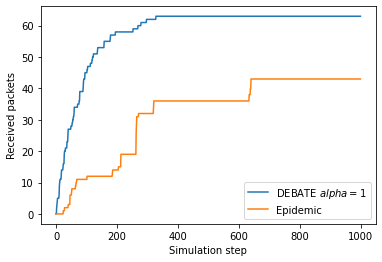

In [704]:
plt.plot(range(1000), np.cumsum(received_pcks_1))
plt.plot(range(1000), np.cumsum(p_received_pcks)[:1000])
plt.xlabel('Simulation step')
plt.ylabel('Received packets')

plt.legend(['DEBATE $alpha = 1$', 'Epidemic'])
plt.savefig('results/debate_0_epidemic')
plt.show()


#plt.plot(range(1000), )

In [705]:
importlib.reload(simulator)
from simulator import *
received_pcks_s01, dropped_pcks_s01, energy_consumption_s01, remaining_energy_s01, P_succ_s01, W_sum_s01 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.1,
                                                                                                              deltaW = 0.1,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)

received_pcks_s03, dropped_pcks_s03, energy_consumption_s03, remaining_energy_s03, P_succ_s03, W_sum_s03 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.3,
                                                                                                              deltaW = 0.1,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)
                                                                                                              

received_pcks_s05, dropped_pcks_s05, energy_consumption_s05, remaining_energy_s05, P_succ_s05, W_sum_s05 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.5,
                                                                                                              deltaW = 0.1,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)                                      
received_pcks_s07, dropped_pcks_s07, energy_consumption_s07, remaining_energy_s07, P_succ_s07, W_sum_s07 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.7,
                                                                                                              deltaW = 0.1,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)                                      

(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121) (122) (123) (124) (125) (126) (127) (128) (129) (130) (131) (132) (133) (134) (135) (136) (137) (138) (139) (140) (141) (142) (143) (144) (145) (146) (147) (148) (149) (150) (151) (152) (153) (154) (155) (156) (157) (158) (159) (160) (161) (162) (163) (164) (165) (166) (167) (168) (169) (170) (171) (172) (173) (174) (175) (176) (177) (178) (179) (180) (181) (182) (183) (184) 

0
0
0
0


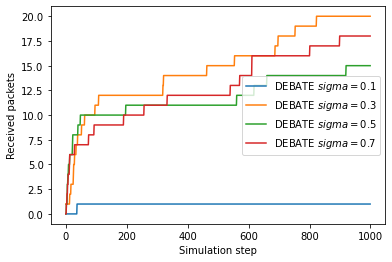

In [710]:
plt.plot(range(1000), np.cumsum(received_pcks_s01))
plt.plot(range(1000), np.cumsum(received_pcks_s03))
plt.plot(range(1000), np.cumsum(received_pcks_s05))
plt.plot(range(1000), np.cumsum(received_pcks_s07))
plt.xlabel('Simulation step')
plt.ylabel('Received packets')

plt.legend(['DEBATE $sigma = 0.1$', 'DEBATE $sigma = 0.3$' , 'DEBATE $sigma = 0.5$','DEBATE $sigma = 0.7$'])
#plt.savefig('results/debate_0_epidemic')

print(sum(dropped_pcks_s01))

print(sum(dropped_pcks_s03))

print(sum(dropped_pcks_s05))

print(sum(dropped_pcks_s07))
#plt.plot(range(1000), )

plt.savefig('results/sigma')
plt.show()


In [707]:
importlib.reload(simulator)
from simulator import *
received_pcks_b01, dropped_pcks_b01, energy_consumption_b01, remaining_energy_b01, P_succ_b01, W_sum_b01 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.1,
                                                                                                              deltaW = 0.1,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)
received_pcks_b03, dropped_pcks_b03, energy_consumption_b03, remaining_energy_b03, P_succ_b03, W_sum_b03 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.1,
                                                                                                              deltaW = 0.3,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)
                                                                                                              

received_pcks_b05, dropped_pcks_b05, energy_consumption_b05, remaining_energy_b05, P_succ_s05, W_sum_b05 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.1,
                                                                                                              deltaW = 0.5,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)                                      
received_pcks_b07, dropped_pcks_b07, energy_consumption_b07, remaining_energy_b07, P_succ_b07, W_sum_b07 = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = 0.1,
                                                                                                              deltaW = 0.7,
                                                                                                              alpha = 0.05,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 30)                                      




(0) (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121) (122) (123) (124) (125) (126) (127) (128) (129) (130) (131) (132) (133) (134) (135) (136) (137) (138) (139) (140) (141) (142) (143) (144) (145) (146) (147) (148) (149) (150) (151) (152) (153) (154) (155) (156) (157) (158) (159) (160) (161) (162) (163) (164) (165) (166) (167) (168) (169) (170) (171) (172) (173) (174) (175) (176) (177) (178) (179) (180) (181) (182) (183) (184) 

0
0
0
0


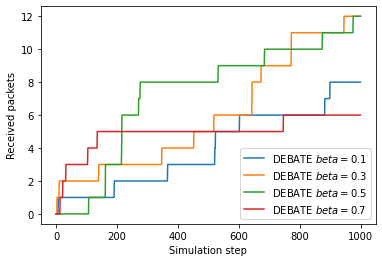

In [711]:
plt.plot(range(1000), np.cumsum(received_pcks_b01))
plt.plot(range(1000), np.cumsum(received_pcks_b03))
plt.plot(range(1000), np.cumsum(received_pcks_b05))
plt.plot(range(1000), np.cumsum(received_pcks_b07))
plt.xlabel('Simulation step')
plt.ylabel('Received packets')

plt.legend(['DEBATE $beta = 0.1$', 'DEBATE $beta = 0.3$' , 'DEBATE $beta = 0.5$','DEBATE $beta = 0.7$'])
#plt.savefig('results/debate_0_epidemic')

print(sum(dropped_pcks_b01))

print(sum(dropped_pcks_b03))

print(sum(dropped_pcks_b05))

print(sum(dropped_pcks_b07))
#plt.plot(range(1000), )

plt.savefig('results/beta')
plt.show()


In [268]:
importlib.reload(simulator)
from simulator import *

res = []
a_s = [0.001, 0.005, 0.01, 0.02]
b_s = [0.1, 0.3, 0.5, 0.7]
s_s = [0.1, 0.3, 0.5, 0.7]

for a in a_s:
    for b in b_s:
        for s in s_s:
            

            received_pcks,generated_pcks, dropped_pcks, energy_consumption, remaining_energy, P_succ, W_sum = start_simulation(radius = 50,
                                                                                                              arrival_rate = 1/10,
                                                                                                              energy_per_packet = 5,
                                                                                                              deltaP = s,
                                                                                                              deltaW = b,
                                                                                                              alpha = a,
                                                                                                              simulation_len = 1000,
                                                                                                              last_generation = 1000,
                                                                                                              max_bundle_size = 5,
                                                                                                              debug = False,
                                                                                                              num_dev = 20)
        
            res.append( {'a':a, 'b':b, 's':s, "received_pcks":sum(received_pcks),"generated_pcks":sum(generated_pcks), "dropped_pcks":sum(dropped_pcks), "energy_consumption":sum(energy_consumption), "remaining_energy":sum(remaining_energy)})

In [269]:
respd = pd.DataFrame(res)

In [270]:
respd

,a,b,s,received_pcks,generated_pcks,dropped_pcks,energy_consumption,remaining_energy
0,0.001,0.1,0.1,38,1946,586,4545,233389
1,0.001,0.1,0.3,18,2014,391,3545,230578
2,0.001,0.1,0.5,25,1990,271,3340,312833
3,0.001,0.1,0.7,33,2047,256,3305,383209
4,0.001,0.3,0.1,43,2026,436,4500,308712
...,...,...,...,...,...,...,...,...
59,0.020,0.5,0.7,17,1978,37,1605,759152
60,0.020,0.7,0.1,3,1964,7,570,1014746
61,0.020,0.7,0.3,6,2080,25,960,1036679
62,0.020,0.7,0.5,16,2010,33,1330,856057


In [281]:
respd['score'] = respd['received_pcks']/respd['generated_pcks']/respd['energy_consumption']

In [284]:
respd.sort_values(by = 'score', ascending = False)

,a,b,s,received_pcks,generated_pcks,dropped_pcks,energy_consumption,remaining_energy,score
52,0.020,0.3,0.1,10,1996,10,490,1061128,0.000010
56,0.020,0.5,0.1,9,1977,21,545,1130851,0.000008
33,0.010,0.1,0.3,24,1965,8,1580,789896,0.000008
6,0.001,0.3,0.5,34,2046,199,2420,278372,0.000007
58,0.020,0.5,0.5,22,2007,39,1605,792616,0.000007
...,...,...,...,...,...,...,...,...,...
60,0.020,0.7,0.1,3,1964,7,570,1014746,0.000003
48,0.020,0.1,0.1,2,2000,3,385,1149948,0.000003
1,0.001,0.1,0.3,18,2014,391,3545,230578,0.000003
19,0.005,0.1,0.7,9,1980,126,1880,668899,0.000002
